#                            PYTHON PROJECT-2
##                           **DATA ANALYSIS ON NYPD ARREST DATA**

In [2]:
##Import necessary libraries

import pandas as pd
import numpy as np
from google.colab import files
import io
import os
import matplotlib.pyplot as plt

In [3]:
##Read Data file from Local drive

data = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date_.csv to NYPD_Arrest_Data__Year_to_Date_.csv


In [10]:
df = pd.read_csv(io.StringIO(data['NYPD_Arrest_Data__Year_to_Date_.csv'].decode('utf-8')))
df.head(1)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)


# Clean up the data!

In [11]:
# Find NAN
nan_df = df[all_data.isna().any(axis=1)]
display(nan_df.head())

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
3,238821533,01/08/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
6,239406147,01/20/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
9,239828064,01/28/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
10,241020842,02/21/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)


In [12]:
df = df.dropna(how='all')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,01/06/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,01/08/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


# Getting Into The Data

In [19]:
#First 5 rows
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,01/06/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,01/08/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


In [15]:
#Last 5 rows
df.tail(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
93233,245643921,05/25/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,40,0,25-44,M,BLACK HISPANIC,1006851,233366,40.807184,-73.918356,POINT (-73.918356 40.807184)
93234,244421351,05/01/2022,817.0,TORTURE/INJURE ANIMAL CRUELTY,364.0,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,AM 0353000,M,B,40,2,25-44,M,BLACK,1007208,234859,40.811280,-73.917061,POINT (-73.917061 40.81128)
93235,245240736,05/18/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,M,25,0,45-64,F,WHITE HISPANIC,1000581,231070,40.800896,-73.941011,POINT (-73.941011 40.800896)
93236,246474038,06/11/2022,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,40,0,25-44,F,BLACK HISPANIC,1005835,234850,40.811260,-73.922021,POINT (-73.922021 40.81126)
93237,245621424,05/25/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,33,0,45-64,M,WHITE HISPANIC,1001360,246031,40.841960,-73.938158,POINT (-73.938158 40.84196)


In [13]:
# Total Columns
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [16]:
# Number of Borough
df.groupby('ARREST_BORO').count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_BORO,,,,,,,,,,,,,,,,,,
B,21198,21198,21191,21198,21176,21198,21198,21014,21198,21198,21198,21198,21198,21198,21198,21198,21198,21198
K,25431,25431,25419,25431,25404,25431,25431,25301,25431,25431,25431,25431,25431,25431,25431,25431,25431,25431
M,22997,22997,22988,22997,22981,22997,22997,22656,22997,22997,22997,22997,22997,22997,22997,22997,22997,22997
Q,19416,19416,19211,19416,19181,19416,19416,19183,19416,19416,19416,19416,19416,19416,19416,19416,19416,19416
S,4196,4196,4196,4196,4192,4196,4196,4173,4196,4196,4196,4196,4196,4196,4196,4196,4196,4196


In [78]:
#Number of Sex Group
df.groupby('PERP_SEX').count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH
PERP_SEX,,,,,,,,,,,,,,,,,,,
F,16269,16269,16225,16269,16218,16269,16269,16190,16269,16269,16269,16269,16269,16269,16269,16269,16269,16269,16269
M,76969,76969,76780,76969,76716,76969,76969,76137,76969,76969,76969,76969,76969,76969,76969,76969,76969,76969,76969


In [22]:
#Number of Age Group
df.groupby('AGE_GROUP').count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
AGE_GROUP,,,,,,,,,,,,,,,,,,
18-24,16255,16255,16206,16255,16185,16255,16255,16110,16255,16255,16255,16255,16255,16255,16255,16255,16255,16255
25-44,53758,53758,53619,53758,53571,53758,53758,53168,53758,53758,53758,53758,53758,53758,53758,53758,53758,53758
45-64,18491,18491,18451,18491,18450,18491,18491,18329,18491,18491,18491,18491,18491,18491,18491,18491,18491,18491
65+,1350,1350,1345,1350,1344,1350,1350,1337,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
<18,3384,3384,3384,3384,3384,3384,3384,3383,3384,3384,3384,3384,3384,3384,3384,3384,3384,3384


In [23]:
# Number of Offence Description
df.groupby('OFNS_DESC').count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
OFNS_DESC,,,,,,,,,,,,,,,,,,
(null),304,304,71,304,0,304,304,304,304,304,304,304,304,304,304,304,304,304
ADMINISTRATIVE CODE,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
ADMINISTRATIVE CODES,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
ALCOHOLIC BEVERAGE CONTROL LAW,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THEFT OF SERVICES,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
THEFT-FRAUD,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
UNAUTHORIZED USE OF A VEHICLE,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


# Selecting Borough and analysis on its data

In [25]:
# Selecting Borough
df2 = df[(df['ARREST_BORO'] == 'B')]
df2.head(1)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
15,240475883,02/11/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,50,0,25-44,M,BLACK,1010914,260940,40.882862,-73.903574,POINT (-73.9035744897024 40.8828621313214)


In [26]:
# Arrest Precinct based on Sex group
table = pd.pivot_table(df2, values='ARREST_PRECINCT', index=['PERP_SEX'], aggfunc=np.sum)
table

,ARREST_PRECINCT
PERP_SEX,
F,178255
M,780656


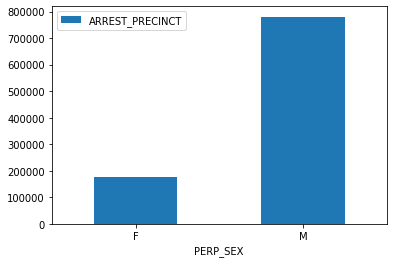

In [27]:
from operator import index
ax = table.plot.bar(y='ARREST_PRECINCT', rot=0)

In [30]:
# Arrest Precinct based on Perpetrator’s race
table2 = pd.pivot_table(df2, values='ARREST_PRECINCT', index=['PERP_RACE'], aggfunc=np.sum)

table2['Percentage'] = (table2['ARREST_PRECINCT'] / table2['ARREST_PRECINCT'].sum())*100
table2

,ARREST_PRECINCT,Percentage
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,1724,0.179787
ASIAN / PACIFIC ISLANDER,13040,1.359876
BLACK,458286,47.792339
BLACK HISPANIC,167140,17.430189
UNKNOWN,2908,0.303261
WHITE,32037,3.340977
WHITE HISPANIC,283776,29.593570


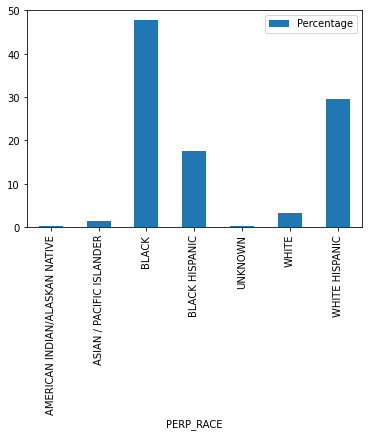

In [34]:
ax = table2.plot.bar(y='Percentage')

In [37]:
# Arrest Precinct based on Age Group
table3 = pd.pivot_table(df2, values='ARREST_PRECINCT', index=['AGE_GROUP'], aggfunc=np.sum)

table3['Percentage'] = (table3['ARREST_PRECINCT'] / table3['ARREST_PRECINCT'].sum())*100
table3

,ARREST_PRECINCT,Percentage
AGE_GROUP,,
18-24,182310,19.012192
25-44,545378,56.874726
45-64,180130,18.784851
65+,11029,1.150159
<18,40064,4.178073


In [40]:
# Arrest Precinct based on Offence Description
table4 = pd.pivot_table(df2, values='ARREST_PRECINCT', index=['OFNS_DESC'], aggfunc=np.sum)

table4['Percentage'] = (table4['ARREST_PRECINCT'] / table4['ARREST_PRECINCT'].sum())*100
table4

,ARREST_PRECINCT,Percentage
OFNS_DESC,,
(null),1020,0.106371
ADMINISTRATIVE CODE,412,0.042965
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,438,0.045677
ALCOHOLIC BEVERAGE CONTROL LAW,1128,0.117633
ARSON,865,0.090206
ASSAULT 3 & RELATED OFFENSES,185791,19.375208
BURGLAR'S TOOLS,2313,0.241211
BURGLARY,23364,2.436514
CHILD ABANDONMENT/NON SUPPORT,215,0.022421


In [41]:
## Monthly arrest Precinct

## Selecting Columns
df3 = df2[['ARREST_DATE', 'OFNS_DESC', 'ARREST_BORO','ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']]
df3.head(3)

,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
15,02/11/2022,RAPE,B,50,25-44,M,BLACK
17,01/28/2022,ARSON,B,45,45-64,M,BLACK
21,03/06/2022,BURGLARY,B,50,25-44,M,BLACK


In [42]:
#Adding month Columns
df3['MONTH'] = pd.to_datetime(df3['ARREST_DATE']).dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df3.head(4)

,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
15,02/11/2022,RAPE,B,50,25-44,M,BLACK,2
17,01/28/2022,ARSON,B,45,45-64,M,BLACK,1
21,03/06/2022,BURGLARY,B,50,25-44,M,BLACK,3
23,03/06/2022,RAPE,B,41,25-44,M,WHITE HISPANIC,3


In [46]:
#Monthly Arrest Precinct data
df3.groupby(['MONTH']).sum()

,ARREST_PRECINCT
MONTH,
1,135334
2,150810
3,175490
4,163461
5,165893
6,167923


# Data analysis between  Selected Borough and all others Boroughs

In [89]:
## Arrest Precinct based on Sex group
table4 = pd.pivot_table(df, values='ARREST_PRECINCT', index=['ARREST_BORO'], columns=['PERP_SEX'], aggfunc=np.sum)
table4['FEMALE PERCENT'] = (table4['F'] / (table4['F'] + table4['M']))*100
table4['MALE PERCENT'] = (table4['M'] / (table4['F'] + table4['M']))*100
table4

PERP_SEX,F,M,FEMALE PERCENT,MALE PERCENT
ARREST_BORO,,,,
B,178255,780656,18.589316,81.410684
K,319151,1564034,16.947406,83.052594
M,71804,345706,17.198151,82.801849
Q,372983,1726283,17.767305,82.232695
S,95896,411661,18.893642,81.106358


In [90]:
# Selecting offence "MURDER & NON-NEGL. MANSLAUGHTE" as a hightest crime
#Checking this crime rate in all borough 
df4 = df[(df['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTE')]
df4.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH
139,239368571,01/19/2022,139.0,"MURDER,UNCLASSIFIED",101.0,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252502,F,B,45,0,18-24,M,BLACK,1032140,242004,40.830792,-73.826946,POINT (-73.826946 40.830792),1
243,238570046,01/03/2022,139.0,"MURDER,UNCLASSIFIED",101.0,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252501,F,Q,103,0,25-44,M,ASIAN / PACIFIC ISLANDER,1041879,197083,40.707439,-73.792139,POINT (-73.792139 40.707439),1


In [91]:
table5 = pd.pivot_table(df4, values='ARREST_PRECINCT', index=['ARREST_BORO'], columns=['OFNS_DESC'], aggfunc=np.sum)
table5['Percentage'] = (table5['MURDER & NON-NEGL. MANSLAUGHTE'] / table5['MURDER & NON-NEGL. MANSLAUGHTE'].sum())*100
table5

OFNS_DESC,MURDER & NON-NEGL. MANSLAUGHTE,Percentage
ARREST_BORO,,
B,12995,28.532221
K,14406,31.630256
M,3895,8.551982
Q,11964,26.268526
S,2285,5.017016


In [99]:
# Arrest precinct age group wise
table6 = pd.pivot_table(df, values='ARREST_PRECINCT', index=['ARREST_BORO'], columns=['AGE_GROUP'], aggfunc=np.sum)
table6

AGE_GROUP,18-24,25-44,45-64,65+,<18
ARREST_BORO,,,,,
B,182310,545378,180130,11029,40064
K,341986,1094966,351478,25117,69638
M,64872,237078,95823,6904,12833
Q,370776,1240055,382736,35562,70137
S,95357,281256,99069,7278,24597


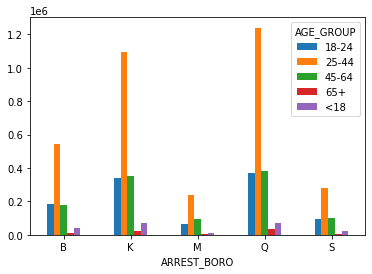

In [93]:
ax = table6.plot.bar(rot=0)

In [100]:
#Monthly arrest precinct
df['MONTH'] = pd.to_datetime(df['ARREST_DATE']).dt.month
df.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863),1
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404),1


In [95]:
table7 = pd.pivot_table(df, values='ARREST_PRECINCT', index=['MONTH'], columns=['ARREST_BORO'], aggfunc=np.sum)
table7['TOTAL'] = (table7['B'] + table7['K'] + table7['M'] + table7['Q'] + table7['S'])
table7['Percentage'] = (table7['TOTAL'] / table7['TOTAL'].sum())*100
table7

ARREST_BORO,B,K,M,Q,S,TOTAL,Percentage
MONTH,,,,,,,
1,135334,266487,60475,305094,68322,835712,14.245668
2,150810,274527,62642,320724,75180,883883,15.066798
3,175490,344984,77720,359296,91553,1049043,17.882139
4,163461,328052,71737,357687,92425,1013362,17.273916
5,165893,339587,72203,378914,88285,1044882,17.811210
6,167923,329548,72733,377551,91792,1039547,17.720269


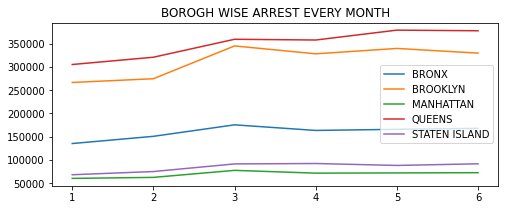

In [96]:
plt.figure(figsize=(8,3))
plt.title('BOROGH WISE ARREST EVERY MONTH')

plt.plot(table7.index, table7.B, label ='BRONX')
plt.plot(table7.index, table7.K, label ='BROOKLYN')
plt.plot(table7.index, table7.M, label ='MANHATTAN')
plt.plot(table7.index, table7.Q, label ='QUEENS')
plt.plot(table7.index, table7.S, label ='STATEN ISLAND')

plt.legend()
plt.show()

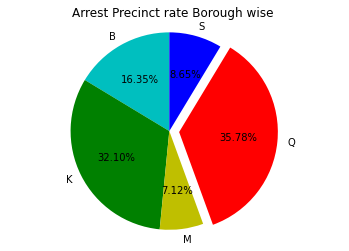

In [101]:
labels = 'B', 'K', 'M', 'Q', 'S'
sections = [958911, 1883185, 417510, 2099266, 507557]
colors = ['c', 'g', 'y', 'r', 'b']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0, 0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Arrest Precinct rate Borough wise ')
plt.show()

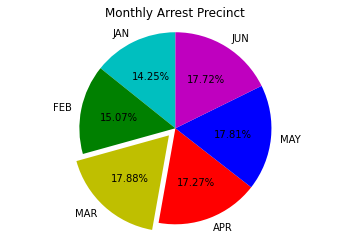

In [102]:
labels = 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN'
sections = [835712, 883883, 1049043, 1013362, 1044882, 1039547]
colors = ['c', 'g', 'y', 'r', 'b', 'm']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0, 0.1, 0, 0, 0),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Monthly Arrest Precinct')
plt.show()